In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
df=pd.read_csv('training_dataset.csv')

In [5]:
df.head()

,label,word_count,num_stop_words,num_chars,num_punctuation_chars,word_count_after_preprocessing,num_chars_after_preprocessing,vector_dim_1,vector_dim_2,vector_dim_3,...,vector_dim_91,vector_dim_92,vector_dim_93,vector_dim_94,vector_dim_95,vector_dim_96,vector_dim_97,vector_dim_98,vector_dim_99,vector_dim_100
0,ham,20,4,111,9,16,82,-0.580355,0.007112,-0.976935,...,0.518878,0.497694,-0.090783,0.009786,0.404360,-0.024591,0.145488,-0.293120,0.501582,-0.175949
1,ham,6,0,29,6,6,23,-0.427296,-0.043355,-0.790381,...,0.326726,0.445335,-0.144925,0.105700,0.364651,-0.027538,0.004716,-0.113986,0.182881,-0.253901
2,spam,28,5,155,5,20,110,-0.219919,0.018497,-0.652489,...,0.153814,0.264300,0.085201,0.226342,0.216582,-0.001449,-0.046417,-0.281185,0.236028,-0.549548
3,ham,11,2,49,6,9,35,-0.624623,0.055353,-1.439270,...,0.667178,0.806222,-0.131574,0.124313,0.451901,-0.234886,-0.067293,-0.029182,0.448625,-0.219913
4,ham,13,6,61,2,8,40,-0.331633,-0.067030,-1.235357,...,0.939712,0.105435,-0.233439,0.112147,-0.122173,0.130926,0.006515,-0.164775,1.332866,-0.211998


In [6]:
df['label'].value_counts(normalize=True).mul(100).round(2)

label
ham     77.23
spam    22.77
Name: proportion, dtype: float64

<Axes: xlabel='label', ylabel='count'>

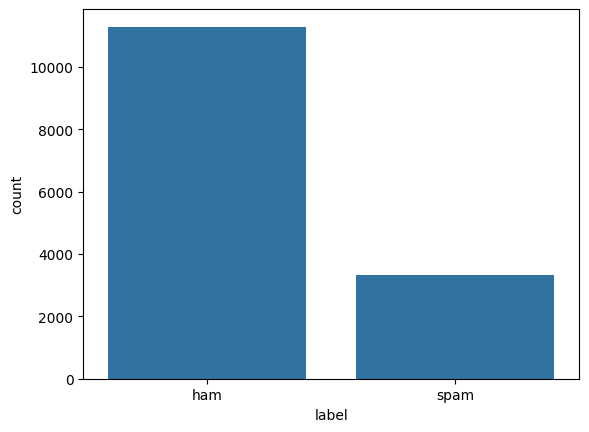

In [7]:
sns.countplot(data=df,x='label')

Now we will try different technique to handle this imbalance dataset and then train logistic regression model to improve our confusion matrix

### Undersampling

Under sampling is a technique used to balance imbalanced datasets. When a dataset has 
unequal distribution of classes, meaning one class (the majority class) has more samples and 
another class (the minority class) has fewer samples, under sampling can be used to address 
imbalanced data issues.

The concept of under sampling is straightforward: you randomly remove some samples from 
the majority class to create a balance between the classes. The objective is to reduce the size 
of the majority class to bring it closer to the minority class, allowing machine learning 
algorithms to work with balanced training data.


In [8]:
# Split the dataset into majority and minority classes
majority_df = df[df['label'] == 'ham']
minority_df = df[df['label'] == 'spam']

In [9]:
from sklearn.utils import shuffle

# Apply random undersampling to the majority class
undersampled_majority_df = majority_df.sample(n=minority_df.shape[0], random_state=42)

# Combine the undersampled majority class with the minority class
undersampled_df = pd.concat([undersampled_majority_df, minority_df])

# Shuffle the resulting DataFrame to avoid any order bias
undersampled_df = shuffle(undersampled_df, random_state=42)

In [10]:
undersampled_df

,label,word_count,num_stop_words,num_chars,num_punctuation_chars,word_count_after_preprocessing,num_chars_after_preprocessing,vector_dim_1,vector_dim_2,vector_dim_3,...,vector_dim_91,vector_dim_92,vector_dim_93,vector_dim_94,vector_dim_95,vector_dim_96,vector_dim_97,vector_dim_98,vector_dim_99,vector_dim_100
9454,spam,478,111,2329,94,225,1556,-0.742571,0.056805,-1.090551,...,0.246021,0.496028,-0.021485,0.217330,0.855205,0.055762,0.232937,-0.392544,0.218755,-0.669109
539,ham,3,0,22,4,3,13,-0.907094,0.024249,-1.265011,...,0.578325,0.609337,0.078742,0.216860,0.247046,-0.110220,0.016368,-0.397618,0.743338,-0.468851
7825,spam,94,11,424,27,50,302,-0.450510,-0.080707,-1.176415,...,0.652798,0.266771,0.175751,0.353908,0.158754,0.031330,-0.053345,-0.256496,0.873674,-0.444276
3874,ham,36,16,147,2,20,92,-0.649262,-0.147775,-1.263627,...,0.618557,0.575755,-0.084262,0.461424,0.319758,0.031208,0.218871,-0.268210,0.776118,-0.525315
2351,ham,5,0,25,2,5,23,-0.246032,0.021336,-0.320875,...,0.200757,0.159549,-0.019560,0.007184,0.123750,-0.010160,-0.019106,-0.201883,0.132013,-0.119051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3464,spam,27,4,177,7,18,124,-0.473478,0.081300,-0.936235,...,0.423304,0.353742,0.119800,0.158643,0.163426,-0.037419,-0.112867,-0.469129,0.487134,-0.238590
9411,spam,43,12,218,7,22,145,-0.478176,0.089654,-0.896823,...,0.525359,0.130315,0.054578,0.080587,0.108703,0.027636,-0.025636,-0.433563,0.569776,-0.238266
9519,spam,103,22,557,24,54,397,-0.520601,0.002500,-0.803976,...,0.525064,0.274743,-0.091798,-0.003423,0.196569,-0.013553,-0.042787,-0.340685,0.547155,-0.297315
10011,spam,101,30,536,19,52,372,-0.440312,-0.016453,-1.072130,...,0.625618,0.326245,0.079748,0.153372,0.046322,0.014867,-0.094633,-0.384471,0.826448,-0.379803


In [11]:
undersampled_df['label'].value_counts()

label
spam    3329
ham     3329
Name: count, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [13]:
X=undersampled_df.drop(columns='label')

In [14]:
X

,word_count,num_stop_words,num_chars,num_punctuation_chars,word_count_after_preprocessing,num_chars_after_preprocessing,vector_dim_1,vector_dim_2,vector_dim_3,vector_dim_4,...,vector_dim_91,vector_dim_92,vector_dim_93,vector_dim_94,vector_dim_95,vector_dim_96,vector_dim_97,vector_dim_98,vector_dim_99,vector_dim_100
9454,478,111,2329,94,225,1556,-0.742571,0.056805,-1.090551,0.333467,...,0.246021,0.496028,-0.021485,0.217330,0.855205,0.055762,0.232937,-0.392544,0.218755,-0.669109
539,3,0,22,4,3,13,-0.907094,0.024249,-1.265011,-0.262990,...,0.578325,0.609337,0.078742,0.216860,0.247046,-0.110220,0.016368,-0.397618,0.743338,-0.468851
7825,94,11,424,27,50,302,-0.450510,-0.080707,-1.176415,-0.181617,...,0.652798,0.266771,0.175751,0.353908,0.158754,0.031330,-0.053345,-0.256496,0.873674,-0.444276
3874,36,16,147,2,20,92,-0.649262,-0.147775,-1.263627,-0.013371,...,0.618557,0.575755,-0.084262,0.461424,0.319758,0.031208,0.218871,-0.268210,0.776118,-0.525315
2351,5,0,25,2,5,23,-0.246032,0.021336,-0.320875,-0.088820,...,0.200757,0.159549,-0.019560,0.007184,0.123750,-0.010160,-0.019106,-0.201883,0.132013,-0.119051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3464,27,4,177,7,18,124,-0.473478,0.081300,-0.936235,-0.071744,...,0.423304,0.353742,0.119800,0.158643,0.163426,-0.037419,-0.112867,-0.469129,0.487134,-0.238590
9411,43,12,218,7,22,145,-0.478176,0.089654,-0.896823,-0.144021,...,0.525359,0.130315,0.054578,0.080587,0.108703,0.027636,-0.025636,-0.433563,0.569776,-0.238266
9519,103,22,557,24,54,397,-0.520601,0.002500,-0.803976,-0.088013,...,0.525064,0.274743,-0.091798,-0.003423,0.196569,-0.013553,-0.042787,-0.340685,0.547155,-0.297315
10011,101,30,536,19,52,372,-0.440312,-0.016453,-1.072130,-0.275313,...,0.625618,0.326245,0.079748,0.153372,0.046322,0.014867,-0.094633,-0.384471,0.826448,-0.379803


In [15]:
y=undersampled_df['label']

In [16]:
y

9454     spam
539       ham
7825     spam
3874      ham
2351      ham
         ... 
3464     spam
9411     spam
9519     spam
10011    spam
4678      ham
Name: label, Length: 6658, dtype: object

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [18]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=500,solver='liblinear')

# Train the model
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=500, solver='liblinear')

In [20]:
# Make predictions on the scaled test set
y_pred = model.predict(X_test_scaled)

In [21]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.87


In [22]:
# Print confusion matrix and classification report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[571  88]
 [ 84 589]]


In [23]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         ham       0.87      0.87      0.87       659
        spam       0.87      0.88      0.87       673

    accuracy                           0.87      1332
   macro avg       0.87      0.87      0.87      1332
weighted avg       0.87      0.87      0.87      1332



In [24]:
from sklearn.metrics import roc_auc_score
y_pred_proba = model.predict_proba(X_test)
roc_auc_score(y_test, y_pred_proba[:, 0])

e:\Programming & DS\# Projects\Phishing Email Detection\myenv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


np.float64(0.3750211383360353)

In [25]:
from sklearn.metrics import roc_auc_score
y_pred_proba = model.predict_proba(X_test)
roc_auc_score(y_test, y_pred_proba[:, 1])

e:\Programming & DS\# Projects\Phishing Email Detection\myenv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


np.float64(0.624965333128902)

### Oversampling

Oversampling is a technique used to balance imbalanced datasets. When a dataset has 
unequal class distribution, meaning one class (the majority class) has more samples and 
another class (the minority class) has fewer samples, oversampling is used to increase the size 
of the minority class to create a balance.


The concept of oversampling is to increase the number of examples in the minority class to 
bring it closer to the majority class in terms of size. The objective is to provide balanced 
training data to machine learning algorithms so that they can learn patterns from both classes.

In [26]:
df=pd.read_csv('training_dataset.csv')

In [27]:
df.shape

(14617, 107)

In [28]:
# Split the data into majority and minority classes
majority_class = df[df['label'] == 'ham']
minority_class = df[df['label'] == 'spam']

# Determine the number of samples to add to the minority class
samples_needed = len(majority_class) - len(minority_class)

samples_needed

7959

In [29]:
X = df.drop(columns=['label'])
y = df['label']

In [31]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
# Check the original class distribution
original_class_distribution = Counter(y)
print("Original class distribution:", original_class_distribution)

# Initialize RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)

# Apply random oversampling to balance the dataset
X_oversampled, y_oversampled = oversampler.fit_resample(X, y)

# Check the new class distribution after oversampling
new_class_distribution = Counter(y_oversampled)
print("New class distribution after oversampling:", new_class_distribution)

Original class distribution: Counter({'ham': 11288, 'spam': 3329})
New class distribution after oversampling: Counter({'ham': 11288, 'spam': 11288})


In [32]:

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, test_size=0.3, random_state=42)

In [33]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=500,solver='liblinear')

# Train the model
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=500, solver='liblinear')

In [35]:
# Make predictions on the scaled test set
y_pred = model.predict(X_test_scaled)

In [36]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.88


In [37]:
# Print confusion matrix and classification report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[2927  451]
 [ 343 3052]]


In [38]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         ham       0.90      0.87      0.88      3378
        spam       0.87      0.90      0.88      3395

    accuracy                           0.88      6773
   macro avg       0.88      0.88      0.88      6773
weighted avg       0.88      0.88      0.88      6773



In [39]:
from sklearn.metrics import roc_auc_score
y_pred_proba = model.predict_proba(X_test)
roc_auc_score(y_test, y_pred_proba[:, 0])

e:\Programming & DS\# Projects\Phishing Email Detection\myenv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


np.float64(0.5614037290585971)

In [40]:
from sklearn.metrics import roc_auc_score
y_pred_proba = model.predict_proba(X_test)
roc_auc_score(y_test, y_pred_proba[:, 1])

e:\Programming & DS\# Projects\Phishing Email Detection\myenv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


np.float64(0.4353314045399889)

### SMOTE

---
The main concept of SMOTE is to create synthetic examples among existing examples in the
minority class. This means generating new samples artificially to balance the data, providing
sufficient training data for the model to learn the patterns in the minority class effectively.




In [41]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from collections import Counter



# Check the original class distribution
original_class_distribution = Counter(y)
print("Original class distribution:", original_class_distribution)

# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)  # Auto adjusts to balance the dataset
X_smote, y_smote = smote.fit_resample(X, y)

# Check the new class distribution after SMOTE
new_class_distribution = Counter(y_smote)
print("New class distribution after SMOTE:", new_class_distribution)



Original class distribution: Counter({'ham': 11288, 'spam': 3329})
New class distribution after SMOTE: Counter({'ham': 11288, 'spam': 11288})


e:\Programming & DS\# Projects\Phishing Email Detection\myenv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "e:\Programming & DS\# Projects\Phishing Email Detection\myenv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Program Files\Python311\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Program Files\Python311\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Program Files\Python311\Lib\subpr

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=42)

In [43]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=500,solver='liblinear',penalty='l2')

# Train the model
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=500, solver='liblinear')

In [45]:
# Make predictions on the scaled test set
y_pred = model.predict(X_test_scaled)

In [46]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.90


In [47]:
# Print confusion matrix and classification report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[2965  413]
 [ 285 3110]]


In [48]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         ham       0.91      0.88      0.89      3378
        spam       0.88      0.92      0.90      3395

    accuracy                           0.90      6773
   macro avg       0.90      0.90      0.90      6773
weighted avg       0.90      0.90      0.90      6773



In [49]:
from sklearn.metrics import roc_auc_score
y_pred_proba = model.predict_proba(X_test)
roc_auc_score(y_test, y_pred_proba[:, 0])

e:\Programming & DS\# Projects\Phishing Email Detection\myenv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


np.float64(0.6237182287538443)

In [50]:
from sklearn.metrics import roc_auc_score
y_pred_proba = model.predict_proba(X_test)
roc_auc_score(y_test, y_pred_proba[:, 1])

e:\Programming & DS\# Projects\Phishing Email Detection\myenv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


np.float64(0.372836015071096)

In [51]:
import pickle

# Save the model
with open('logistic_regression__best_model.pkl', 'wb') as file:
    pickle.dump(model, file)